# INF200 Lecture No J06

### Hans Ekkehard Plesser with material by Jonas van den Brink
### 9 June 2020

## Today's topics
- Classic population dynamics models
- Examples of BioSim Dynamics
- Analysis of BioSim Dynamics
- From discrete to continuous diffusion models

## Classic models

### Lotka-Volterra model

- Classic model of predator-prey population dynamics
- Each species is represented by a single density variable
- Dynamics are described by coupled, non-linear differential equations
\begin{align}
\dot{x} &= \alpha x - \beta x y  \\
\dot{y} &= \delta xy - \gamma y 
\end{align}
where $x$ is prey and $y$ is predator.
- Notes:
    - Solutions are continuous functions
    - Fractional values for $x$ and $y$ are possible, and animals never become extinct
    - One can remove three out of the four parameters by re-scaling
- See also [Wikipedia](https://en.wikipedia.org/wiki/Lotka–Volterra_equations)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [2]:
plt.rcParams['figure.figsize'] = (12, 4)

In [3]:
def du_dt(u, t=0):
    alpha = 1.0 # growth of prey
    beta = 0.1  # rate of predation
    delta = 0.075 # growth of predators
    gamma = 1.5 # decay of predators

    x, y = u
    return np.array([alpha*x - beta*x*y, 
                     delta*x*y - gamma*y])

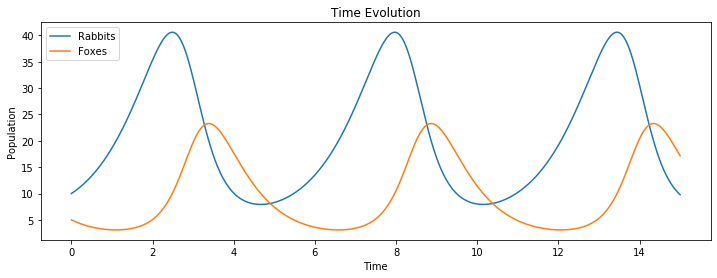

In [16]:
t = np.linspace(0, 15, 100001)
u = scipy.integrate.odeint(du_dt, (10, 5), t)

rabbit, fox = u[:, 0], u[:, 1]

plt.plot(t, rabbit)
plt.plot(t, fox)
plt.legend(['Rabbits', 'Foxes'], loc='upper left')
plt.title('Time Evolution')
plt.xlabel('Time')
plt.ylabel('Population');

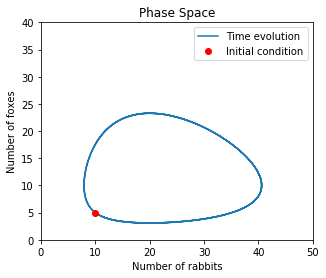

In [7]:
plt.plot(rabbit, fox)
plt.title('Phase Space')
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.axis([0, 50, 0, 40])
plt.plot(10, 5, 'ro')
plt.gca().set_aspect(aspect='equal')
plt.legend(['Time evolution', 'Initial condition']);

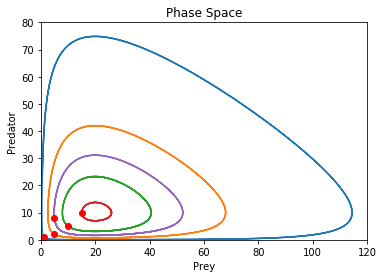

In [17]:
for u0 in [(1, 1), (5, 2), (10, 5), (15, 10), (5, 8)]:
    u = scipy.integrate.odeint(du_dt, u0, t)
    plt.plot(u[:,0], u[:,1])
    plt.plot(u0[0], u0[1], 'ro')

plt.title('Phase Space')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.gca().set_aspect(aspect='equal')
plt.axis([0, 120, 0, 80]);

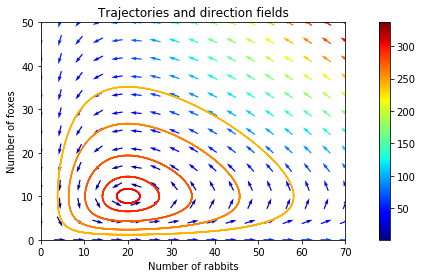

In [9]:
# Plot trajectories
values = ((6, 3), (9, 4), (12, 6), (15, 8), (18, 9))
colors = plt.cm.autumn_r(np.linspace(0.3, 1., len(values)))

for u0, col in zip(values, colors):
    u = scipy.integrate.odeint(du_dt, u0, t)
    plt.plot(u[:,0], u[:,1], color=col)

# Plot phase space direction arrows
x = np.linspace(0, 70, 17)
y = np.linspace(0, 50, 13)
X, Y = np.meshgrid(x, y)
DX, DY = du_dt([X, Y])

# Normalize direction vectors
M = np.hypot(DX, DY)
M[M == 0] = 1.                                 # Avoid zero division errors
DX /= M                                        # Normalize each arrows
DY /= M

plt.title('Trajectories and direction fields')
plt.quiver(X, Y, DX, DY, M, pivot='mid', cmap=plt.cm.jet)
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.gca().set_aspect(aspect='equal')
plt.axis([0, 70, 0, 50]);
plt.colorbar();

#### The Lotka-Volterra is quite different from the BioSim model

- No spatial distribution (comparable to a single BioSim cell)
- Continuous, rather than discrete, in time
- Assumes infinite fodder for the prey/herbivores
- No random elements, it is a fully deterministic model
- Animals can never die out—why?

### Agent-based models

- A model such as the BioSim model is known as an *agent-based* model, because we have acting individuals.
- For a recent scientific paper comparing a continuous to an agent-based model of locust migration, see

    Bernoff AJ, Culshaw-Maurer M, Everett RA, Hohn ME, Strickland WC, Weinburd J (2020) 
    
    Agent-based and continuous models of hopper bands for the Australian plague locust: How resource consumption mediates pulse formation and geometry. 
    
    PLoS Comput Biol 16(5):e1007820. https://doi.org/10.1371/journal.pcbi.1007820

------------------------

## Examples of BioSim dynamics

- The examples below have been prepared using Plesser's reference implementation

### Herbivores in a single Lowland cell

- 50 herbivores with age 5 and weight 20 placed in single lowland cell
- Default parameters for animals and lowland
- Simulated 250 years
- Simulations performed with five different seeds
- For each simulation, herbivore count for each year is written to csv file

#### Load data from all five simulations to one NumPy array

In [18]:
import glob

In [19]:
mhd = [np.loadtxt(fname, delimiter=',') for fname in glob.glob('data_j06/mono_ho_*.csv')]
t = mhd[0][:, 0]   # time axis

# herbivore counts
h = np.zeros((len(t), len(mhd)))  
for k, cts in enumerate(mhd):
    h[:, k] = cts[:, 1]

In [20]:
h[:5, :]

array([[ 50.,  50.,  50.,  50.,  50.],
       [ 48.,  47.,  47.,  44.,  49.],
       [ 85.,  76.,  81.,  80.,  81.],
       [100., 102.,  93.,  92., 104.],
       [109., 105.,  98., 105., 109.]])

#### Show all count traces

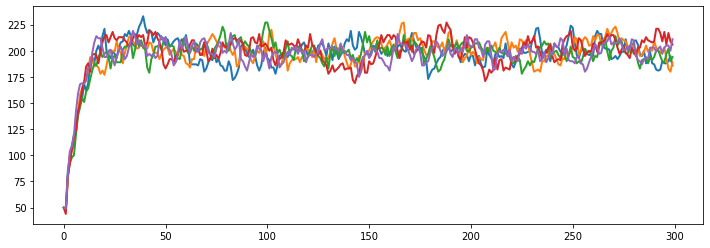

In [21]:
plt.plot(t, h, lw=2);

#### Extract data in stationary state

In [22]:
stat_n0 = 50
t_stat = t[stat_n0:]
h_stat = h[stat_n0:, :]

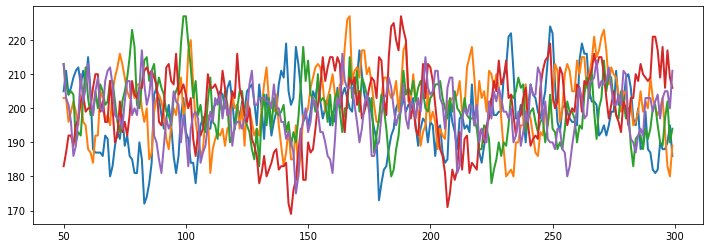

In [23]:
plt.plot(t_stat, h_stat, lw=2);

#### Mean and standard deviation of count

In [24]:
print("mean(num herb) = {:.1f} ± {:.1f}".format(h_stat.mean(), h_stat.std()))

mean(num herb) = 199.7 ± 9.3


#### Histogram of counts per simulation/seed

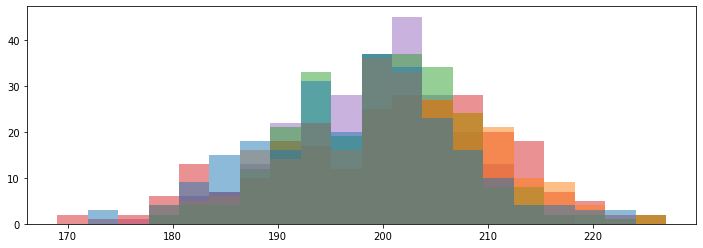

In [25]:
plt.hist(h_stat, histtype='stepfilled', bins=20, lw=3, alpha=0.5);

### Herbivores and carnivores in a single lowland cell

- 50 herbivores with age 5 and weight 20 placed in single lowland cell
- Simulated 50 years
- 20 carnivores with age 5 and weight 20 added
- Simulated 250 years
- Default parameters for animals and lowland
- Simulations performed with five different seeds
- For each simulation, herbivore and carnivore count for each year is written to csv file

In [26]:
mhcd = [np.loadtxt(fname, delimiter=',') for fname in glob.glob('data_j06/mono_hc_*.csv')]
tc = mhcd[0][:, 0]   # time axis

# herbivore and carnivore counts
hc = np.zeros((len(t), len(mhd)))  
cc = np.zeros((len(t), len(mhd)))  
for k, cts in enumerate(mhcd):
    hc[:, k] = cts[:, 1]
    cc[:, k] = cts[:, 2]

#### Plot animal counts

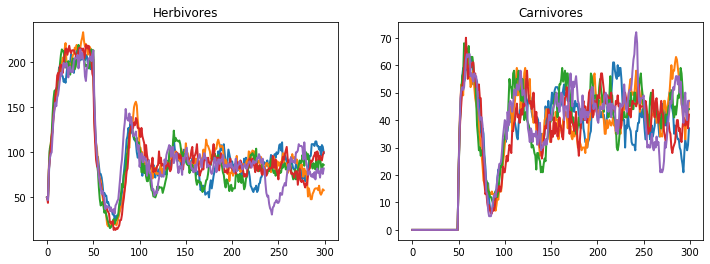

In [27]:
plt.subplot(1, 2, 1);
plt.plot(tc, hc, lw=2);
plt.title('Herbivores');

plt.subplot(1, 2, 2);
plt.plot(tc, cc, lw=2);
plt.title('Carnivores');

#### Late phase plots

With herbivores and carnivores in the simulation, there is not really a stationary state, but after 150 years the initial transients have died out. We look at the time after that.

In [28]:
stat_n0c = 150
tc_stat = tc[stat_n0c:]
hc_stat = hc[stat_n0c:, :]
cc_stat = cc[stat_n0c:, :]

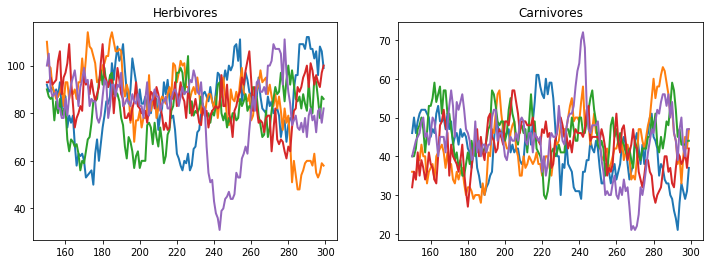

In [29]:
plt.subplot(1, 2, 1);
plt.plot(tc_stat, hc_stat, lw=2);
plt.title('Herbivores');

plt.subplot(1, 2, 2);
plt.plot(tc_stat, cc_stat, lw=2);
plt.title('Carnivores');

#### Mean animal numbers in late phase

In [30]:
print("mean(num herb) = {:5.1f} ± {:4.1f}".format(hc_stat.mean(), hc_stat.std()))
print("mean(num carn) = {:5.1f} ± {:4.1f}".format(cc_stat.mean(), cc_stat.std()))

mean(num herb) =  83.6 ± 13.5
mean(num carn) =  43.2 ±  7.5


---------------------------------------------------

### Sample simulation on an island

The figure below is based on the `check_sim.py` simulation script with the following
non-standard parameter values:

Item   | Parameter | Value
-- | -- | --
Herbivores | $\zeta$ | 3.2
           | $\xi$ | 1.8
Carnivores | $a_{1/2}$ | 70
           | $\phi_{\text{age}}$ | 0.5
           | $\omega$ | 0.3
           | $F$ | 65
           | $\Delta\Phi_{\text{max}}$ | 9
Lowland    | $f_{\text{max}}$ | 700

- Initially, 150 herbivores (age 5, weight 20) are placed at location (10, 10)
- After 100 years, 40 carnivores (age 5, weight 20) are added at location (10, 10)
- Simulation is continued for another 400 years

![check_sim](figures/check_sim_long.pdf)

------------------

### Migration only

- For testing purposes
- Particular parameter settings
    - No death, birth, or eating
    - Very large `a_half` to ensure "perfect" fitness
    - All animals with age 5, weight 50
```python
    sim.set_animal_parameters('Herbivore',
                                {'mu': 1, 'omega': 0, 'gamma': 0,
                                 'a_half': 1000})
    sim.set_animal_parameters('Carnivore',
                                {'mu': 1, 'omega': 0, 'gamma': 0,
                                 'F': 0, 'a_half': 1000})
```
- 1000 herbivores and 1000 carnivores placed in center initially

![mig0](figures/mig_00000.png) | ![mig1](figures/mig_00001.png) | ![mig2](figures/mig_00002.png)
-- | -- | --
![mig3](figures/mig_00003.png) | ![mig4](figures/mig_00004.png) | ![mig10](figures/mig_00010.png)

-------------------

## Exploring the BioSim Model

To have a better understanding of a complex and connected model, it is useful to simplify it and break it into components, which is what we will do now.

This is simply an exploration, not a definite analysis.

### Herbivores

First we look at the herbivores. We only look at the standard set of parameters here (`f_max` for Lowland included for convenience here): 

In [117]:
hp = {'w_birth': 8.,
      'sigma_birth': 1.5,
      'beta': 0.9,
      'eta': 0.05,
      'a_half': 40.,
      'phi_age': 0.6,
      'w_half': 10.,
      'phi_weight': 0.1,
      'mu': 0.25,
      'gamma': 0.2,
      'zeta': 3.5,
      'xi': 1.2,
      'omega': 0.4,
      'F': 10.,
      'f_max': 800.}

#### Fitness function
The Fitness function is defined as the product of two sigmoidal functions, one for age and one for weight.
    $$q^+ = \frac{1}{1+\exp[{\phi_{\rm age}({\rm age} - {\rm age}_{1/2})}]}, \qquad q^- = \frac{1}{1+\exp[-{\phi_{\rm weight}({\rm weight} - {\rm weight}_{1/2})}]}$$

If you look closer at the functions, the biggest difference between them is the sign of the exponent, this makes the age-function monotonically decreasing, and the weight-function monotonically increasing. Let us plot them to get a better view

In [118]:
def q(sgn, x, xhalf, phi):
    return 1. / (1. + np.exp(sgn * phi * (x - xhalf)))

def Phi(a, w, p=hp):
    return (q(+1, a, p['a_half'], p['phi_age'])
            * q(-1, w, p['w_half'], p['phi_weight']))

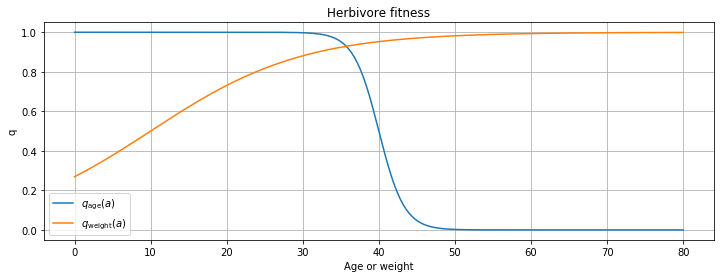

In [119]:
x = np.linspace(0, 80, 201);
plt.plot(x, q(+1, x, hp['a_half'], hp['phi_age']), label='$q_{\mathrm{age}}(a)$');
plt.plot(x, q(-1, x, hp['w_half'], hp['phi_weight']), label='$q_{\mathrm{weight}}(a)$');

plt.title('Herbivore fitness');
plt.legend();
plt.xlabel('Age or weight');
plt.ylabel('q');
plt.grid();

Interpretation: As the two functions are multiplied together to yield the fitness, an animal is fitter the younger and heavier it is. A starving or old animal can never be fit.

------------

### Stationary weight for herbivores
- Under the following assumptions
    - Constant number of animals (no birth/death)
    - Infinite fodder

- How heavy will the animals become?

- Let $w_0$ be the birth weight of the animal, then the weight at the end of the first and second year is
\begin{align}
w_1 &= (1-\eta)(w_0 + \beta F), \\
w_2 &= (1-\eta)(w_1 + \beta F) = (1-\eta)((1-\eta)(w_0 + \beta F) + \beta F).
\end{align}
And for year $n$:
\begin{align}
w_n &= (1-\eta)(w_{n-1} + \beta F) = (1-\eta)^n w_0 + \beta F \sum_{k=1}^{n}(1-\eta)^k\\
    &= (1-\eta)^n w_0 + \beta F \frac{(1-\eta)-(1-\eta)^{n+1}}{\eta}
\end{align}

This formula for $w_n$ is a testable prediction for the time evolution of the BioSim model with given parameters.

The stationary weight, $\bar{w}$, is the 'stable' weight where the weight is not changing any more
$$\bar{w} = (1-\eta)(\bar{w} + \beta F)$$
Which can be solved to yield
        $$\bar{w} = \frac{1-\eta}{\eta}\beta F.$$

We obtain the same result by taking
$$\bar{w}=\lim_{n\to\infty}w_n=\beta F\frac{1-\eta}{\eta}$$
- For standard parameters, we have

In [120]:
print('Expected stationary weight for herbivores: {:.1f}'.format(
        (1-hp['eta'])/hp['eta'] * hp['beta'] * hp['F']))

Expected stationary weight for herbivores: 171.0


- This is a testable prediction.
- It is confirmed by simulation.

---------------------

### The life of a Herbivore

Our reference simulation for Herbivores in a single lowland location shows the following situation after 200 years

![stat](figures/mono_hoh_2345_00020.png)

We would like to understand better why we observe this behavior, especially the number of animals in the stationary state.

**The remainder of this notebook is an attempt at analysis. It still requires proper validation.**

#### First observations
- Approximately $N=200$ animals on the island
- The weight distribution shows three modes
    - around $8$, $15$ and $25$ units
- There are no animals with weight over $33$ units
- Age has a long tail with very few animals above age 30
- Fitness has three modes, around $0.45$, $0.6$ and $0.8$ 
- Up to age $30$, an animal has high age-fitness $>0.99$
- Beyond weight $15$, an animal has reasonable weight-fitness $>0.6$
- With and appetite of $F=10$ and $f_{\text{max}}=800$ units of fodder available per year, $n_F=80$ animals can eat each year.
- The probability that a Herbivore eats in any given year is thus $p_e=n_F/N=0.4$.

#### A simple life cycle: Newborn, Juvenile, Adult

##### The animal is a *newborn* with weight $w_b\pm \sigma=8\pm 1.5$ units.
1. For $w=8$, the newborn has fitness $\approx 0.45$ and probability of death $\approx 0.22$.
1. Until it eats, it loses $5\%\approx 0.4$ units of weight per year, with weight fitness dropping.
1. A newborn will eat with probability $p_e=0.4$ and then add $\beta F=9$ units of weight.
1. Once a newborn has eaten, it thus has $w\approx 17$ and is a *juvenile*. 
1. Since animals eat with $p_e=0.4$, it takes on average $2.5$ years until an animal eats for the first time. 
1. Newborns are the leftmost mode in the weight distribution.

##### The animal becomes a *juvenile* within $\approx 5$ years with a $w\approx 17$ units.
1. Age fitness is still almost perfect.
1. Overall fitness is $\approx 0.67$ with probability of death $0.13$.
1. The animal loses $\approx 0.9$ units of weight per year.
1. Since the animal eats every 2.5 years on average, most animals will eat before they have lost more than 4 units of weight.
1. The first meal as juvenile thus brings the animal to $22-26$ units of weight and it becomes an *adult*.
1. The middle mode of the weight distribution are the juveniles.

    
##### The animal becomes an adult within 10 years of birth after eating twice, usually faster (5 years)
1. Adults are animals that can give birth the following year, i.e., have $w\geq \zeta (w_b+\sigma)=33.25$ units after eating in the following year.
1. Strictly speaking, adulthood is thus reached in the first year with $w\geq w_A = (\zeta(w_b+\sigma)-\beta F)/(1-\eta) \approx 25.5$ units.
1. With $N\approx 200$ animals in the location, any animal with sufficient weight will give birth.
1. Upon giving birth, the animal loses on average $\xi w_b=9.6$ units of weight.
1. This explains why we observe no weights above 33 units.
1. With adult weights from 25.5–33.25 units, average adult weight in the year before giving birth will be $\approx 29.4$ units.
1. After eating and giving birth, the average weight will then be $\approx 29.4 + 9 - 9.6=28.8$ units.
1. An adult who does not eat, loses $\approx 1.5$ units of weight.
1. In the average $2.5$ years between two meals, the animal loses $\approx 4$ units of weight, while eating once adds $9$ units, so net gain is $5$ units per $2.5$ years.
1. An animal loses $\approx 9.6$ units on birth, so it takes two feeding cycles or $5$ years to be able to give birth again.
1. An adult gives birth approximately once every 5 years.
    

--------------------------

#### Death of newborns: How many newborns die without every eating?

1. Start with $w_0=w_b$.
2. With probability $1-p_e$, the animal does not eat.
3. Weight at end of year then is $w_1=(1-\eta)w_0$.
4. Two possibilities
    1. Animal dies with probability $\pi(1, w_1)=\omega(1-\Phi(1, w_1))$
    1. Animal survives with probability $1-p$
5. If animal survived, continue with step 2.

The total probability of dying without ever eating is the sum of the probability of dying in year 1, 2, 3, ..., with ever decreasing weight and thus fitness. Note that $w>0$ always, even though $w\to 0+$ for $t\to\infty$.

Mathematically, the probability of newborn starvation is thus

\begin{align}
P_S &= \pi(1, w_1) + (1-\pi(1, w_1))
         \left[(1-p_e)\pi(2, w_2) + (1-p_e)(1-\pi(2, w_2))\left[(1-p_e)\pi(3, w_3) + \cdots \right]\right] \\
    &= \pi(1, w_1) + (1-p_e)(1-\pi(1, w_1))\pi(2, w_2) + \dots \\
    &= \sum_{n=1}^{\infty} \left[ \pi(n, w_n) (1-p_e)^{n-1} \prod_{k=1}^{n-1} 1-\pi(k, w_k) \right]
\end{align}

with $w_k=(1-\eta)^k w_b$. In the sum,
- the first term $\pi(n, w_n)$ describes the probability of dying in year $n$
- the second term $(1-p_e)^{n-1}$ the probability of not eating for the first $n$ years (animals does not eat in year it is born, therefore $-1$)
- the third (product) term the probability of not dying during the first $n-1$ years.

The expression for $P_S$ can only be evaluated numercially. As a first approximation, we can assume a fixed value for $\pi(a, w)$ throughout the interval, since fitness does not vary much. Let us define

$$\bar{\pi} = \pi(0, w_b/2) = \omega(1-\Phi(0, w_b/2)$$

and use this value to estimate $p_S$. Then we have

\begin{align}
\bar{P}_S &= \sum_{n=1}^{\infty} \bar{\pi}(1-p_e)^{n-1}(1-\bar{\pi})^{n-1} \\
          &= {\bar{\pi}} \sum_{n=0}^{\infty} \left[(1-p_e)(1-\bar{\pi})\right]^n \\
          &= \frac{\bar{\pi}}{1-(1-p_e)(1-\bar{\pi})}
\end{align}

where we have used the geometric sum formula in the last step.

We can now compute $\bar{P}_S$:

In [248]:
pibar = hp['omega'] * ( 1 - Phi(0, hp['w_birth']/2) )
print('Approximate probability of death: {:.3f}'.format(pibar))

Approximate probability of death: 0.258


Thus, the animal dies with $\approx 26\%$ probability in any given year.

In [249]:
p_e = 0.4
PSbar = pbar / (1 - (1-p_e)*(1-pbar))
print('Estimated percentage of newborns dying: {:.3f}'.format(PSbar))

Estimated percentage of newborns dying: 0.465


This suggests that almost half of all newborns die without ever eating, i.e., without becoming juveniles.

We can now also evaluate the full expression numerically:

In [243]:
def newborn_death(par, w_0=None, a_max=40, N=200):
    w_0 = w_0 if w_0 is not None else par['w_birth']
    p_e = (par['f_max'] / par['F']) / N
    a = np.arange(1, 50)
    w = w_0 * (1-par['eta'])**a
    f = Phi(a, w)
    pd = par['omega'] * (1-f)
    pl = np.hstack([np.array([1]), 1-pd[:-1]])
    Pl = np.cumprod(pl)
    pS = pd * (1-p_e)**(a-1) * Pl
    PS = np.cumsum(pS)
    
    return a, PS, pS, f

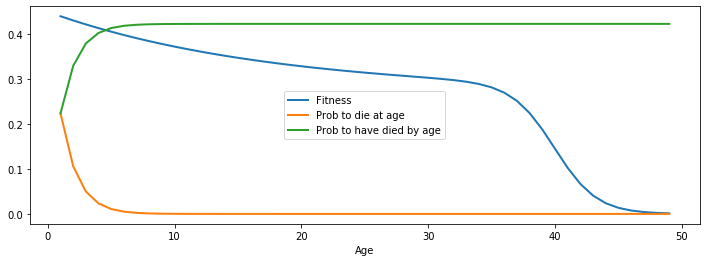

In [256]:
a, PS, pS, f = newborn_death(hp)

plt.plot(a, f, lw=2, label='Fitness');
plt.plot(a, pS, lw=2, label='Prob to die at age');
plt.plot(a, PS, lw=2, label='Prob to have died by age');
plt.legend();
plt.xlabel('Age');

In [257]:
print('Probability to die as newborn P_S = {:.5f}'.format(PS[-1]))

Probability to die as newborn P_S = 0.42328


Thus, the full analysis shows that slightly more than 42% of all newborns die without every having eaten and they do so before they are 10 years old. 

To get a truly complete picutre, we would have to average this over the gaussian distribution of birth weights.

In [258]:
from scipy.stats import norm

In [259]:
wb = np.linspace(hp['w_birth']-5*hp['sigma_birth'], hp['w_birth']+5*hp['sigma_birth'], num=151)
p_wb = norm.pdf(wb, loc=hp['w_birth'], scale=hp['sigma_birth'])
PS_w = np.zeros_like(wb)
for k, w0 in enumerate(wb):
    _, PS, _, _ = newborn_death(hp, w_0=w0)
    PS_w[k] = PS[-1]

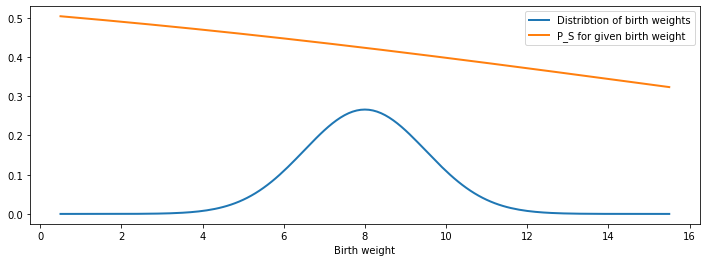

In [260]:
plt.plot(wb, p_wb, lw=2, label='Distribtion of birth weights');
plt.plot(wb, PS_w, lw=2, label='P_S for given birth weight');
plt.legend();
plt.xlabel('Birth weight');

In [261]:
print('P_S weighted over birth weights P*_S = {:.5f}'.format(np.trapz(p_wb * PS_w, wb)))

P_S weighted over birth weights P*_S = 0.42287


This is almost the same value as obtained without averaging over birth weights.

#### Compare to simluation results

- Data collected with a specially instrumented simulation by Plesser.

In [262]:
import pickle

In [263]:
with open('data_j06/mono_hol.pkl', 'rb') as pkfl:
    d = pickle.load(pkfl)

In [264]:
dc = d['cycle']
da = d['age']
dw = d['weight']
df = d['fitness']
na = dc.shape[1]

In [265]:
for k in range(na):
    # remove all born before year 50
    if dc[0, k] < 50:
        dc[:, k] = np.nan
        da[:, k] = np.nan
        dw[:, k] = np.nan
        df[:, k] = np.nan

In [267]:
newborn_d = 0
juvi_d = 0
births = 0
age_d = []
w_d = []
w_b = []

for k in range(na):
    if not np.isfinite(da[0, k]):
        continue
        
    births += 1
    daf = da[np.isfinite(da[:, k]), k]
    xa = np.argmax(daf)
    age_d.append(daf[xa])
    w_d.append(dw[xa, k])
    w_b.append(dw[0, k] / (1-hp['eta']))
               
    if 12 < max(dw[:, k]) < 20:
        juvi_d += 1
               
    if xa < 2 or max(np.diff(dw[:xa, k])) < 0:
        newborn_d += 1
        
print('Births        :', births)
print('Newborns died :', newborn_d)
print('Juveniles died:', juvi_d)
print()
print('Share of newborns died: {:.3f}'.format(newborn_d/births))

Births        : 3462
Newborns died : 1628
Juveniles died: 616

Share of newborns died: 0.470


This value of 47% is in reasonable agreement with the analysis above.

---------------------

#### Further observations from instrumented simulation

##### Distribution of age at death

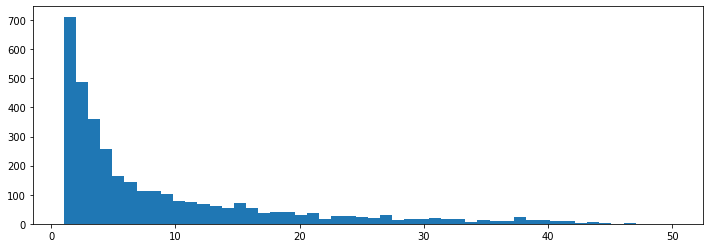

In [268]:
plt.hist(age_d, bins=50);

##### Distribution of birth weights

In [269]:
np.mean(w_b)

7.992791620848321

In [270]:
np.std(w_b)

1.516405954375406

Close to expected 8 ± 1.5. Let's look at distribution plot:

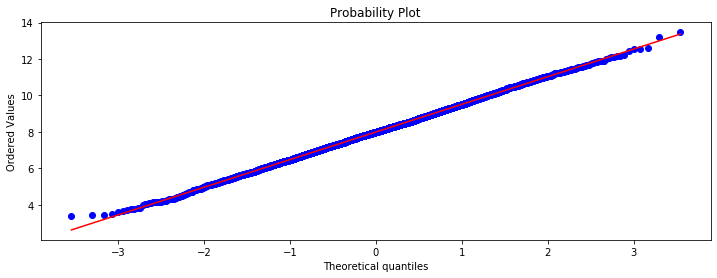

In [272]:
import scipy.stats as stats
stats.probplot(w_b, dist='norm', plot=plt);

Very nice agreement with normal distribution.

##### Distribution of fitness at birth

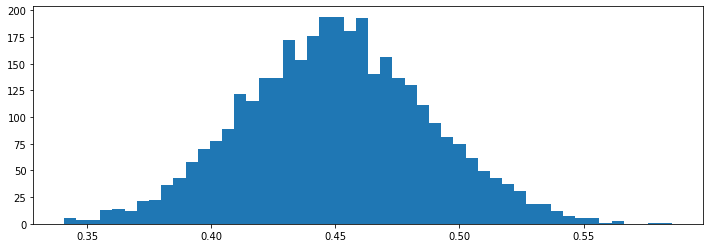

In [234]:
plt.hist(Phi(np.zeros_like(w_b), np.array(w_b)), bins=50);

##### Weight distribution at death

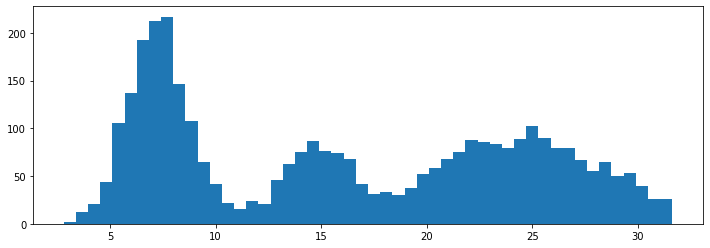

In [236]:
plt.hist(w_d, bins=50);

Newborn, juvenile and adult population clearly visible.

##### Fitness distribution at death

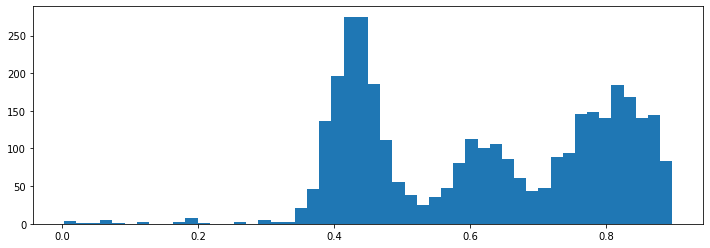

In [238]:
plt.hist(Phi(np.array(age_d), np.array(w_d)), bins=50);

- Reflects the weight distribution.
- Quite a lot of animals seem to die with high fitness.

##### Probability of dying at death

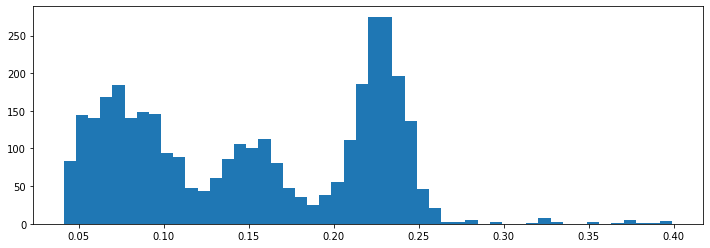

In [273]:
plt.hist(hp['omega'] * (1-Phi(np.array(age_d), np.array(w_d))), bins=50);

- Corresponds to fitness distribution, just reflected
- Many animals die at times when their probability of dying is $<10\%$
- This is plausible, with $10\%$ probability of dying you will die on average after 10 years

### Fitness after birth

- We look closer at the fitnesses of newborn and their parents at the time of birth
    1. Newborns are born with weight $\mathcal{N}(w_b, \sigma)$
        - Newborns usually have fitnesses in $\Phi(0, [w_b \pm 2\sigma]$).
    1. To be able to give birth, a parent needs a weight of at least $\zeta(w_b + \sigma)$.
    1. Since we often have $N>10$ animals in a cell, each animal almost certainly gives birth as soon as it has the minimum weight required.
- Lowest birth-giving weight
    - animal ate at beginning of year and just made it across threshold
    - weight: $\zeta(w_b + \sigma)$
- Highest birth-giving weight
    - animal was just below threshold the previous year
    - lost weight at end of previous year
    - ate this year
    - weight: $(1-\eta)\zeta(w_b+\sigma) + \beta F$
- "Lowest" parent weight after birth (lightest parent, heaviest baby)
    - weight: $\zeta(w_b + \sigma) - \xi(w_b + 2\sigma)$
- "Highest" parent weight after birth (heaviest parent, lightest baby)
    - weight: $(1-\eta)\zeta(w_b+\sigma) + \beta F - \xi(w_b - 2\sigma)$

In [44]:
def plot_pf(age, clr):
    lo = ( hp['zeta'] * (hp['w_birth']+hp['sigma_birth'])
           - hp['xi'] * (hp['w_birth']+2*hp['sigma_birth']) )
    hi = ( (1-hp['eta'])*hp['zeta']*(hp['w_birth']+hp['sigma_birth'])
                     + hp['beta']*hp['F']
                     - hp['xi']*(hp['w_birth']-2*hp['sigma_birth']) )
    plt.fill_between(x, Phi(age*np.ones_like(x), lo), 
                        Phi(age*np.ones_like(x), hi), 
                 color=clr, alpha=.2, label=r'Parent fitness ($a={}$)'.format(age))

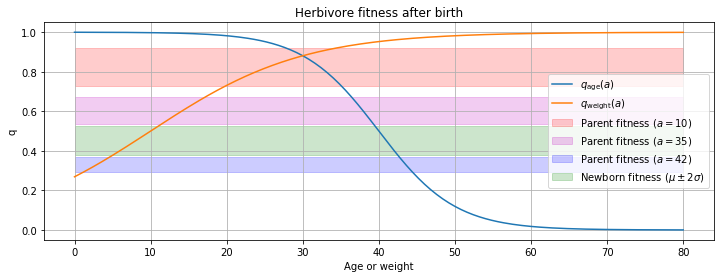

In [71]:
x = np.linspace(0, 80, 201);
plt.plot(x, q(+1, x, hp['a_half'], hp['phi_age']), label='$q_{\mathrm{age}}(a)$');
plt.plot(x, q(-1, x, hp['w_half'], hp['phi_weight']), label='$q_{\mathrm{weight}}(a)$');

plot_pf(10, 'r')
plot_pf(35, 'm')
plot_pf(42, 'b')
plt.fill_between(x, 
                 Phi(np.zeros_like(x), hp['w_birth']-2*hp['sigma_birth']), 
                 Phi(np.zeros_like(x), hp['w_birth']+2*hp['sigma_birth']), 
                 color='g', alpha=.2, label=r'Newborn fitness $(\mu\pm 2\sigma)$')


plt.title('Herbivore fitness after birth');
plt.legend();
plt.xlabel('Age or weight');
plt.ylabel('q');
plt.grid();

Observations from the figure:
- Up to age 35, parents are fitter than newborns after birth (weight is more important than age)
- Beyond age 42, parents are less fit than newborns (age more important than weight)
- Since carnivores hunt the weakest animals first, older parents in some way "sacrifice" themselves for the benefit of newborns.
- Young adults are quite safe from carnivores.